In [3]:
%pip install opencv-python
import cv2
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install scikit-image
from skimage import filters, exposure

Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
N

Matplotlib is building the font cache; this may take a moment.


  Using cached scikit_image-0.24.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.36.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2024.9.20-py3-none-any.whl.metadata (32 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.24.0-cp312-cp312-win_amd64.whl (12.9 MB)
Using cached imageio-2.36.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached tifffile-2024.9.20-py3-none-any.whl (228 kB)
Note: you may need to restart the kernel to use updated packages.


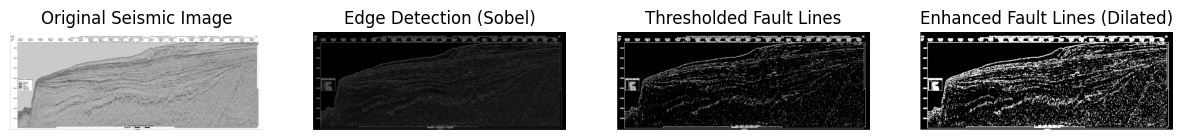

In [4]:
image = cv2.imread("phpB0P7Au.png", cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Edge Detection using Sobel filter (common for highlighting faults)
sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges
sobel_combined = cv2.magnitude(sobelx, sobely)

# Normalize and convert to uint8 type
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
sobel_combined = np.uint8(sobel_combined)

# Step 3: Apply Thresholding to Enhance Fault Lines
_, thresholded_image = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

# Optional: Adjust contrast to make faults stand out more
adjusted_image = exposure.equalize_hist(thresholded_image)

# Step 5: Optional - Use Morphological Operations to Enhance Faults
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=1)
 
# Step 6: Display Results
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title("Original Seismic Image")
plt.imshow(image, cmap="gray")
plt.axis("off")
 
plt.subplot(1, 4, 2)
plt.title("Edge Detection (Sobel)")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")
 
plt.subplot(1, 4, 3)
plt.title("Thresholded Fault Lines")
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")
 
plt.subplot(1, 4, 4)
plt.title("Enhanced Fault Lines (Dilated)")
plt.imshow(dilated_image, cmap="gray")
plt.axis("off")
 
plt.show()

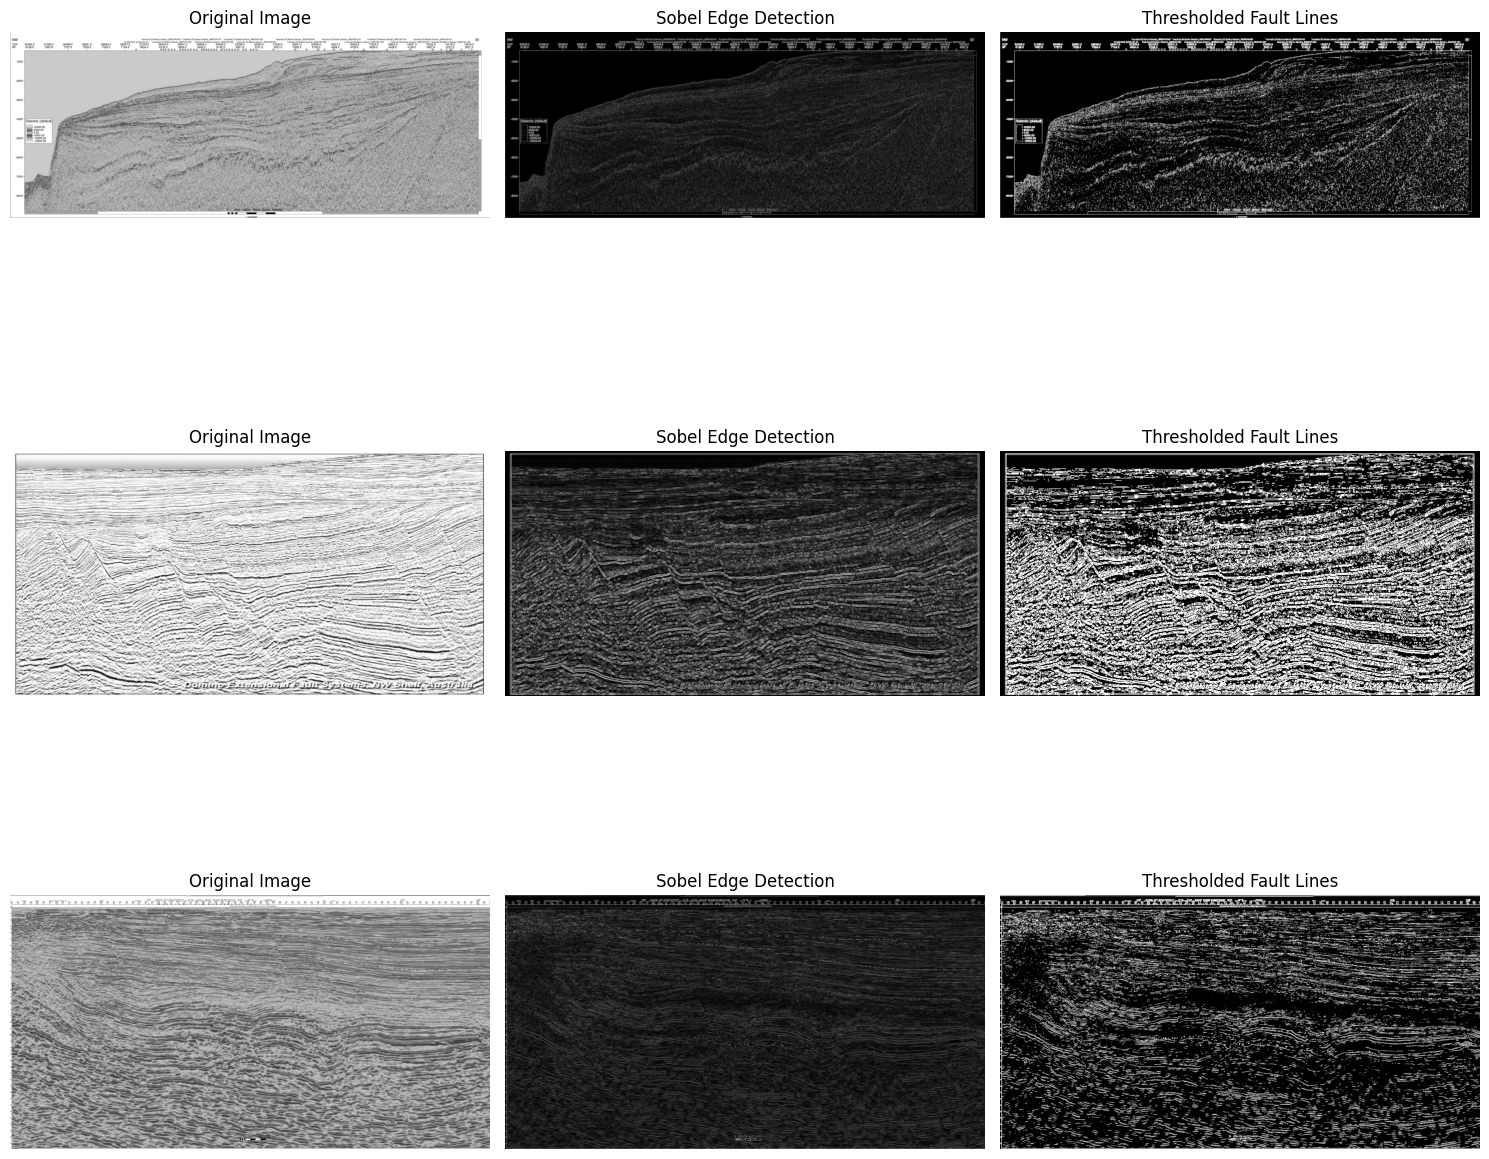

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image file paths
image_paths = ["phpB0P7Au.png", "phpX4w7uo.png", "image (1).png"]

# Preprocess images and store them in a list
processed_images = []
for path in image_paths:
    # Load each image in grayscale
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Gaussian blur with an odd kernel size (e.g., (5, 5))
    blurred_image = cv2.GaussianBlur(image, (1, 1), 0) #ubah parameter
    
    # Edge Detection with Sobel filters
    sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=1)
    sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=1)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    
    # Normalize and convert to uint8
    sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
    sobel_combined = np.uint8(sobel_combined)

    # Thresholding
    _, thresholded_image = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)
    
    # Append processed images to the list
    processed_images.append((image, sobel_combined, thresholded_image))

# Display Results
plt.figure(figsize=(15, 5 * len(processed_images)))  # Dynamically adjusts grid size

for i, (original, sobel, thresholded) in enumerate(processed_images):
    # Original image
    plt.subplot(len(processed_images), 3, i * 3 + 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # Sobel edge detection
    plt.subplot(len(processed_images), 3, i * 3 + 2)
    plt.imshow(sobel, cmap="gray")
    plt.title("Sobel Edge Detection")
    plt.axis("off")

    # Thresholded image
    plt.subplot(len(processed_images), 3, i * 3 + 3)
    plt.imshow(thresholded, cmap="gray")
    plt.title("Thresholded Fault Lines")
    plt.axis("off")

plt.tight_layout()
plt.show()


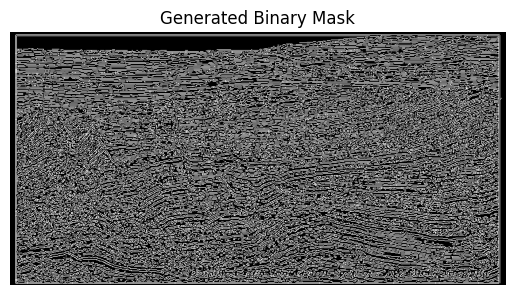

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a seismic image in grayscale
image_path = "phpX4w7uo.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    raise FileNotFoundError("Image file not found or path is incorrect.")

# Apply Canny edge detection to highlight fault lines
edges = cv2.Canny(img, threshold1=50, threshold2=150)

# Ensure the binary mask is in the expected format (0 or 255)
_, binary_mask = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Convert binary mask to uint8 type to avoid compatibility issues
binary_mask = binary_mask.astype(np.uint8)

# Display the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title("Generated Binary Mask")
plt.axis("off")
plt.show()

# Save the binary mask
cv2.imwrite("output_mask.png", binary_mask)


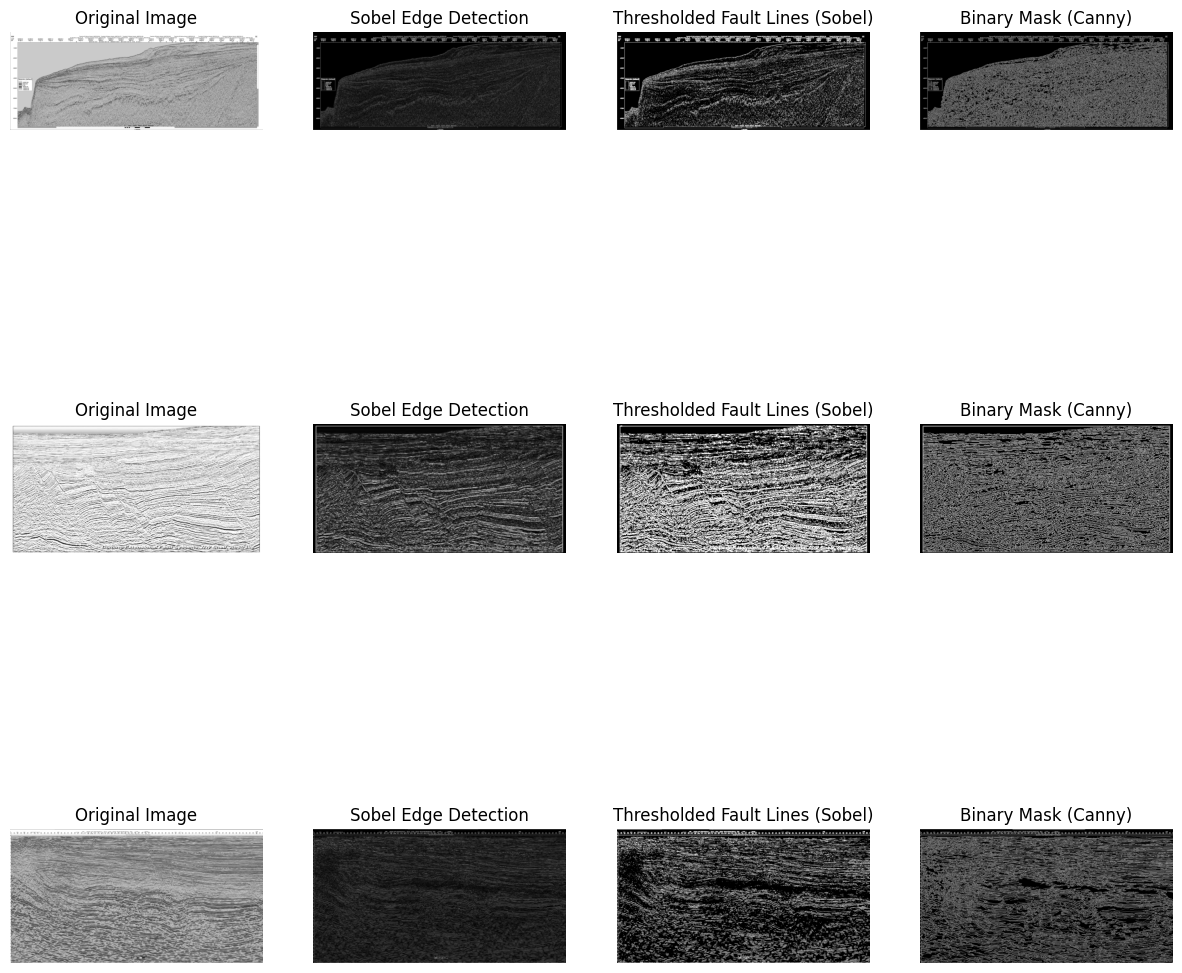

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image file paths
image_paths = ["phpB0P7Au.png", "phpX4w7uo.png", "image (1).png"]

# Preprocess images and store them in a list
processed_images = []
for path in image_paths:
    # Load each image in grayscale
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded correctly
    if image is None:
        raise FileNotFoundError(f"Image file {path} not found or path is incorrect.")
    
    # Apply Gaussian blur with a small kernel size to reduce noise
    blurred_image = cv2.GaussianBlur(image, (1, 1), 0)

    # Sobel edge detection
    sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    
    # Normalize and convert to uint8
    sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Thresholding for Sobel-based edges
    _, thresholded_sobel = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

    # Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=300)
    
    # Convert Canny output to binary (values of 0 and 1)
    binary_mask = (edges > 0).astype(np.uint8)

    # Append processed images to the list
    processed_images.append((image, sobel_combined, thresholded_sobel, binary_mask))

# Display Results
plt.figure(figsize=(15, 5 * len(processed_images)))  # Adjust grid size based on number of images

for i, (original, sobel, thresholded, canny_mask) in enumerate(processed_images):
    # Original image
    plt.subplot(len(processed_images), 4, i * 4 + 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # Sobel edge detection
    plt.subplot(len(processed_images), 4, i * 4 + 2)
    plt.imshow(sobel, cmap="gray")
    plt.title("Sobel Edge Detection")
    plt.axis("off")

    # Thresholded Sobel image
    plt.subplot(len(processed_images), 4, i * 4 + 3)
    plt.imshow(thresholded, cmap="gray")
    plt.title("Thresholded Fault Lines (Sobel)")
    plt.axis("off")

    # Binary mask (Canny) with values 0 and 1
    plt.subplot(len(processed_images), 4, i * 4 + 4)
    plt.imshow(canny_mask, cmap="gray")
    plt.title("Binary Mask (Canny)")
    plt.axis("off")

plt.show()
